# 테크닉 21 : 데이터를 읽어 들이고 확인하자

In [1]:
# 4개의 데이터 셋을 간단히 살펴보기

import pandas as pd

print("* use_log :")
uselog = pd.read_csv("./pyda100-master/Chapter_3/use_log.csv")
display(uselog)

print("* customer_master :")
customer_master = pd.read_csv("./pyda100-master/Chapter_3/customer_master.csv")
display(customer_master)

print("* class_master :")
class_master = pd.read_csv("./pyda100-master/Chapter_3/class_master.csv")
display(class_master)

print("* campaign_master :")
campaign_master = pd.read_csv("./pyda100-master/Chapter_3/campaign_master.csv")
display(campaign_master)

* use_log :


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01
...,...,...,...
197423,L00000049209753,TS977703,2019-03-31
197424,L00000049209754,TS979550,2019-03-31
197425,L00000049209755,TS995299,2019-03-31
197426,L00000049209756,TS995853,2019-03-31


* customer_master :


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0
...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0


* class_master :


,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


* campaign_master :


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


# 테크닉 22 : 고객 데이터를 가공하자

In [2]:
# 'customer'데이터 셋과 'class_master'데이터 셋 join 실시 후, 해당 데이터 셋 파악

from pandasql import sqldf

customer_join = sqldf("""
                            SELECT X.customer_id,
                                   X.name,
                                   X.class,
                                   Y.class_name,
                                   Y.price,
                                   X.gender,
                                   SUBSTR(REPLACE(X.start_date, '-', ''), 1, 8) AS start_date,
                                   SUBSTR(REPLACE(X.end_date, '-', ''), 1, 8) AS end_date,
                                   X.is_deleted,
                                   Z.campaign_id,
                                   Z.campaign_name
                            FROM   customer_master X
                            LEFT JOIN class_master Y
                            ON X.class = Y.class
                            LEFT JOIN campaign_master Z
                            ON X.campaign_id = Z.campaign_id
                      """)

display(customer_join)

# customer_join = pd.merge(customer, class_master, on = "class", how = "left")
# customer_join = pd.merge(customer_join, campaign_master, on = "campaign_id", how = "left")
# customer_join = customer_join.loc[:, ["customer_id", "gender", "start_date", "end_date", "is_deleted", "class", "class_name", "campaign_id", "campaign_name"]]
# display(customer_join.head())
# print("customer_join 데이터 셋 내 데이터 갯수 :", len(customer_join))

,customer_id,name,class,class_name,price,gender,start_date,end_date,is_deleted,campaign_id,campaign_name
0,OA832399,XXXX,C01,0_종일,10500,F,20150501,None,0,CA1,2_일반
1,PL270116,XXXXX,C01,0_종일,10500,M,20150501,None,0,CA1,2_일반
2,OA974876,XXXXX,C01,0_종일,10500,M,20150501,None,0,CA1,2_일반
3,HD024127,XXXXX,C01,0_종일,10500,F,20150501,None,0,CA1,2_일반
4,HD661448,XXXXX,C03,2_야간,6000,F,20150501,None,0,CA1,2_일반
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,0_종일,10500,M,20190314,None,0,CA1,2_일반
4188,HD246549,XXXXX,C01,0_종일,10500,F,20190314,None,0,CA1,2_일반
4189,GD037007,XXXXX,C03,2_야간,6000,M,20190314,None,0,CA1,2_일반
4190,OA953150,XXXXX,C01,0_종일,10500,M,20190314,None,0,CA1,2_일반


In [3]:
# 'customer_join' 데이터 셋 내 null 데이터 갯수 확인
print("* null data count :")
customer_join.isnull().sum()

* null data count :


customer_id         0
name                0
class               0
class_name          0
price               0
gender              0
start_date          0
end_date         2842
is_deleted          0
campaign_id         0
campaign_name       0
dtype: int64

# 테크닉 23 : 고객 데이터를 집계하자

In [4]:
# class별 고객수 집계
print("* count by class :")
display(customer_join.groupby("class_name").count()["customer_id"])

# campaign별 고객수 집계
print("* count by campaign :")
display(customer_join.groupby("campaign_name").count()["customer_id"])

# gender별 고객수 집계
print("* count by gender :")
display(customer_join.groupby("gender").count()["customer_id"])

# is_deleted(삭제여부)별 고객수 집계
print("* count by is_deleted :")
display(customer_join.groupby("is_deleted").count()["customer_id"])


* count by class :


class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

* count by campaign :


campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: customer_id, dtype: int64

* count by gender :


gender
F    1983
M    2209
Name: customer_id, dtype: int64

* count by is_deleted :


is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [5]:
# 'start_date'별 고객수 집계

count_by_YYYY_MM = sqldf("""    
                                SELECT SUBSTR(replace(start_date, "-", ""), 1, 6) AS start_date,
                                       COUNT(1)                                   AS CNT 
                                FROM customer_join
                                GROUP BY SUBSTR(replace(start_date, "-", ""), 1, 6)
                         """)

display(count_by_YYYY_MM)                        

# temp_customer_join = customer_join.loc[:, ["customer_id", "start_date"]]
# temp_customer_join["start_date"] = pd.to_datetime(temp_customer_join["start_date"]).dt.strftime("%Y%m")
# temp_customer_join.groupby("start_date").count()["customer_id"]

,start_date,CNT
0,201505,62
1,201506,69
2,201507,53
3,201508,53
4,201509,71
5,201510,54
6,201511,63
7,201512,67
8,201601,56
9,201602,48


In [7]:
# '20180401'이후에 신규 가입을 한 고객수 집계

customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])
customer_start = customer_join.loc[customer_join["start_date"] >= pd.to_datetime("20180401"), :]
print("* '2018.04.01'이후로 신규 가입을 한 고객수 :", len(customer_start))

* '2018.04.01'이후로 신규 가입을 한 고객수 : 1376


# 테크닉 24 : 최신 고객 데이터를 집계하자

In [6]:
# 2019년 3월의 고객 데이터만 추출

print("* customer_newer :")
customer_newer = sqldf("""
                            SELECT *
                            FROM customer_join
                            WHERE end_date IS NULL OR end_date = '20190331'
                       """)

display(customer_newer)
# customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])
# customer_newer = customer_join.loc[(customer_join["end_date"] >= pd.to_datetime("20190331")) | (customer_join["end_date"].isnull()), :]
# display(customer_newer.head())
# print("'2019.03'월에 대한 고객수 :", len(customer_newer))


* customer_newer :


,customer_id,name,class,class_name,price,gender,start_date,end_date,is_deleted,campaign_id,campaign_name
0,OA832399,XXXX,C01,0_종일,10500,F,20150501,None,0,CA1,2_일반
1,PL270116,XXXXX,C01,0_종일,10500,M,20150501,None,0,CA1,2_일반
2,OA974876,XXXXX,C01,0_종일,10500,M,20150501,None,0,CA1,2_일반
3,HD024127,XXXXX,C01,0_종일,10500,F,20150501,None,0,CA1,2_일반
4,HD661448,XXXXX,C03,2_야간,6000,F,20150501,None,0,CA1,2_일반
...,...,...,...,...,...,...,...,...,...,...,...
2948,HD676663,XXXX,C01,0_종일,10500,M,20190314,None,0,CA1,2_일반
2949,HD246549,XXXXX,C01,0_종일,10500,F,20190314,None,0,CA1,2_일반
2950,GD037007,XXXXX,C03,2_야간,6000,M,20190314,None,0,CA1,2_일반
2951,OA953150,XXXXX,C01,0_종일,10500,M,20190314,None,0,CA1,2_일반


In [7]:
# customer_newr 데이터 셋 내 'end_date'컬럼에 저장된 고유한 데이터 값 파악

print("* distinct value in end_date column :")
display(sqldf("SELECT DISTINCT end_date FROM customer_newer"))

* distinct value in end_date column :


,end_date
0,None
1,20190331


In [8]:
print("* count by class_name :")
display(customer_newer.groupby("class_name").count()["customer_id"])

print("* count by campaign_name :")
display(customer_newer.groupby("campaign_name").count()["customer_id"])

print("* count by gender :")
display(customer_newer.groupby("gender").count()["customer_id"])

* count by class_name :


class_name
0_종일    1444
1_주간     696
2_야간     813
Name: customer_id, dtype: int64

* count by campaign_name :


campaign_name
0_입회비반액할인     311
1_입회비무료       242
2_일반         2400
Name: customer_id, dtype: int64

* count by gender :


gender
F    1400
M    1553
Name: customer_id, dtype: int64

# 테크닉 25 : 이용 이력 데이터를 집계하자

In [9]:
# 고객별 월별 이용 횟수 집계

print("* count_by_customer_and_yyyy_mm :")

import pandas as pd
from pandasql import sqldf

count_by_yyyy_mm = sqldf("""
                            SELECT SUBSTR(REPLACE(usedate, '-', ''), 1, 6) AS use_yyyy_mm,
                                   customer_id,
                                   COUNT(1) AS CNT
                            FROM uselog
                            GROUP BY SUBSTR(REPLACE(usedate, '-', ''), 1, 6), customer_id
                        """)
display(count_by_yyyy_mm)

# uselog["usedate"] = pd.to_datetime(uselog["usedate"])
# uselog["year_month"] = uselog["usedate"].dt.strftime("%Y%m")
# uselog_months = uselog.groupby(["year_month", "customer_id"], as_index=False).count()
# uselog_months.rename(columns = {"log_id" : "count"}, inplace = True)
# del uselog_months["usedate"]
# uselog_months.head()

* count_by_customer_and_yyyy_mm :


,use_yyyy_mm,customer_id,CNT
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [10]:
# 고객별 월별 이용 횟수 평균값, 중앙값, 최대값, 최솟값 집계

print("* aggregate by customer :")
aggregate_by_customer =   sqldf(""" 
                                   SELECT T1.customer_id,
                                          T1.mean,
                                          T2.median,
                                          T1.max,
                                          T1.min
                                   FROM (
                                        SELECT    X.customer_id,
                                                  AVG(X.CNT) AS mean,
                                                  MAX(X.CNT) AS max,
                                                  MIN(X.CNT) AS min
                                        FROM      count_by_yyyy_mm X
                                        GROUP BY  X.customer_id
                                    ) T1,
                                    (
                                        SELECT    DISTINCT customer_id,
                                                  AVG(CASE WHEN rn IN (counter / 2 + 1, counter / 2 + 1 - (counter % 2 = 0)) THEN CNT END) OVER (PARTITION BY customer_id) AS median 
                                        FROM (        
                                                  SELECT *,
                                                       ROW_NUMBER() OVER (PARTITION BY customer_id ORDER BY CNT) AS rn,
                                                       COUNT(1) OVER (PARTITION BY customer_id) AS counter
                                                  FROM   count_by_yyyy_mm
                                        )  
                                    ) T2
                                    WHERE T1.customer_id = T2.customer_id
                               """)
display(aggregate_by_customer)                               

# customer_uselog_agg = uselog_months.groupby("customer_id").agg(["mean", "median", "max", "min"])["count"]
# customer_uselog_agg = customer_uselog_agg.reset_index(drop=False)
# customer_uselog_agg.head()

* aggregate by customer :


,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4
...,...,...,...,...,...
4187,TS995853,9.500000,9.5,11,8
4188,TS998593,8.142857,8.0,9,7
4189,TS999079,4.916667,5.5,9,2
4190,TS999231,4.666667,5.0,8,1


# 테크닉 26 : 이용 이력 데이터로부터 정기 이용 플래그를 작성하자

In [23]:
# 고객별 월별&요일별 이용 횟수 count

import pandas as pd
from pandasql import sqldf

print("* count_by_YYYY_MM_weekday :")
count_by_YYYY_MM_weekday = sqldf("""
                                    SELECT  customer_id,
                                            SUBSTR(REPLACE(usedate, '-', ''), 1, 6) AS year_n_month,
                                            STRFTIME('%w', usedate) AS weekday,
                                            COUNT(1) AS count
                                    FROM   uselog 
                                    GROUP BY customer_id, SUBSTR(REPLACE(usedate, '-', ''), 1, 6), STRFTIME('%w', usedate)
                                """)
display(count_by_YYYY_MM_weekday)                                

# uselog["weekday"] = uselog["usedate"].dt.weekday
# uselog_weekday = uselog.groupby(["customer_id", "year_month", "weekday"]).count()
# uselog_weekday.reset_index(drop=False, inplace=True)
# del uselog_weekday["usedate"]
# uselog_weekday.rename(columns = {"log_id" : "count"}, inplace = True)
# uselog_weekday.head()

* count_by_YYYY_MM_weekday :


,customer_id,year_n_month,weekday,count
0,AS002855,201804,6,4
1,AS002855,201805,3,1
2,AS002855,201805,6,4
3,AS002855,201806,6,5
4,AS002855,201807,2,1
...,...,...,...,...
93328,TS999855,201901,1,1
93329,TS999855,201901,2,1
93330,TS999855,201901,6,4
93331,TS999855,201902,6,4


In [24]:
print("* routine_flg_by_customer :")
routine_flg_by_customer = sqldf("""
                                    SELECT X.customer_id,
                                           MAX(X.count) AS max_count,
                                           CASE WHEN MAX(X.count) >= 4 THEN 1 ELSE 0 END AS routine_flg
                                    FROM (
                                        SELECT *
                                        FROM   count_by_YYYY_MM_weekday
                                    ) X
                                    GROUP BY X.customer_id
                                """)
display(routine_flg_by_customer)              

* routine_flg_by_customer :


,customer_id,max_count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1
...,...,...,...
4187,TS995853,5,1
4188,TS998593,5,1
4189,TS999079,5,1
4190,TS999231,5,1


# 테크닉 27 : 고객 데이터와 이용 이력 데이터를 결합하자

In [37]:
print("* left join of three tables(customer_join, aggregate_by_customer, routine_flg_by_customer) : ")

customer_join = sqldf("""
                            SELECT X.*,
                                   Z.routine_flg
                            FROM customer_join X
                            LEFT JOIN aggregate_by_customer Y
                            ON X.customer_id = Y.customer_id
                            LEFT JOIN routine_flg_by_customer Z
                            ON X.customer_id = Z.customer_id
                     """)

display(customer_join)                     

* left join of three tables(customer_join, aggregate_by_customer, routine_flg_by_customer) : 


,customer_id,name,class,class_name,price,gender,start_date,end_date,is_deleted,campaign_id,campaign_name,mean,median,max,min,max_count,routine_flg,routine_flg
0,OA832399,XXXX,C01,0_종일,10500,F,20150501,None,0,CA1,2_일반,4.833333,5.0,8,2,4,1,1
1,PL270116,XXXXX,C01,0_종일,10500,M,20150501,None,0,CA1,2_일반,5.083333,5.0,7,3,5,1,1
2,OA974876,XXXXX,C01,0_종일,10500,M,20150501,None,0,CA1,2_일반,4.583333,5.0,6,3,5,1,1
3,HD024127,XXXXX,C01,0_종일,10500,F,20150501,None,0,CA1,2_일반,4.833333,4.5,7,2,5,1,1
4,HD661448,XXXXX,C03,2_야간,6000,F,20150501,None,0,CA1,2_일반,3.916667,4.0,6,1,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,0_종일,10500,M,20190314,None,0,CA1,2_일반,8.000000,8.0,8,8,3,0,0
4188,HD246549,XXXXX,C01,0_종일,10500,F,20190314,None,0,CA1,2_일반,10.000000,10.0,10,10,3,0,0
4189,GD037007,XXXXX,C03,2_야간,6000,M,20190314,None,0,CA1,2_일반,8.000000,8.0,8,8,2,0,0
4190,OA953150,XXXXX,C01,0_종일,10500,M,20190314,None,0,CA1,2_일반,11.000000,11.0,11,11,3,0,0


In [38]:
# 'customer_join'레코드의 결측치 확인

print("* null count of customer_join :")
customer_join.isna().sum()

* null count of customer_join :


customer_id         0
name                0
class               0
class_name          0
price               0
gender              0
start_date          0
end_date         2842
is_deleted          0
campaign_id         0
campaign_name       0
mean                0
median              0
max                 0
min                 0
max_count           0
routine_flg         0
routine_flg         0
dtype: int64

# 테크닉 28 : 회원 기간을 계산하자

In [45]:
# 고객별 회원기간 컬럼(membership_period) 추가

print("* customer_join with membership_period column :")

customer_join_with_membership_period = sqldf("""
                                        SELECT customer_id,
                                               name,
                                               class,
                                               class_name,
                                               price,
                                               gender,
                                               SUBSTR(start_date, 1, 4) || '-' || SUBSTR(start_date, 5, 2) || '-' || SUBSTR(start_date, 7, 2) AS start_date,
                                               CASE 
                                                    WHEN end_date IS NULL THEN '2019-04-30'
                                                    ELSE SUBSTR(end_date, 1, 4) || '-' || SUBSTR(end_date, 5, 2) || '-' || SUBSTR(end_date, 7, 2)
                                               END AS end_date,
                                               ROUND((julianday(CASE WHEN end_date IS NULL THEN '2019-04-30' ELSE SUBSTR(end_date, 1, 4) || '-' || SUBSTR(end_date, 5, 2) || '-' || SUBSTR(end_date, 7, 2) END) 
                                               - julianday(SUBSTR(start_date, 1, 4) || '-' || SUBSTR(start_date, 5, 2) || '-' || SUBSTR(start_date, 7, 2))) / 30, 1) AS membership_period,
                                               is_deleted,
                                               campaign_id,
                                               campaign_name,
                                               mean,
                                               median,
                                               max,
                                               min,
                                               routine_flg
                                        FROM customer_join
                                    """)
display(customer_join_with_membership_period)

# from dateutil.relativedelta import relativedelta
# customer_join["calc_date"] = customer_join["end_date"]
# customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))
# customer_join.head()
# customer_join["membership_period"] = 0
# for i in range(len(customer_join)):
    
#     delta = relativedelta(customer_join["calc_date"].iloc[i], customer_join["start_date"].iloc[i])
#     customer_join["membership_period"].iloc[i] = delta.years*12 + delta.months
#     display(customer_join["membership_period"].iloc[i])
    
# customer_join.head()

* customer_join with membership_period column :


,customer_id,name,class,class_name,price,gender,start_date,end_date,membership_period,is_deleted,campaign_id,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,0_종일,10500,F,2015-05-01,2019-04-30,48.7,0,CA1,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,0_종일,10500,M,2015-05-01,2019-04-30,48.7,0,CA1,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,0_종일,10500,M,2015-05-01,2019-04-30,48.7,0,CA1,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,0_종일,10500,F,2015-05-01,2019-04-30,48.7,0,CA1,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,2_야간,6000,F,2015-05-01,2019-04-30,48.7,0,CA1,2_일반,3.916667,4.0,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,0_종일,10500,M,2019-03-14,2019-04-30,1.6,0,CA1,2_일반,8.000000,8.0,8,8,0
4188,HD246549,XXXXX,C01,0_종일,10500,F,2019-03-14,2019-04-30,1.6,0,CA1,2_일반,10.000000,10.0,10,10,0
4189,GD037007,XXXXX,C03,2_야간,6000,M,2019-03-14,2019-04-30,1.6,0,CA1,2_일반,8.000000,8.0,8,8,0
4190,OA953150,XXXXX,C01,0_종일,10500,M,2019-03-14,2019-04-30,1.6,0,CA1,2_일반,11.000000,11.0,11,11,0


# 테크닉 29 : 고객 행동의 각종 통계량을 파악하자

In [46]:
# 고객 한 명당 월 평균 이용횟수

print("* description of customer_join :")
customer_join_with_membership_period.loc[:, ["mean", "median", "max", "min"]].describe()

* description of customer_join :


,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [47]:
# 정기적으로 이용하는 고객수와 그렇지 못한 고객수 파악

print("* count by routine_flg :")
customer_join_with_membership_period.groupby("routine_flg").count()["customer_id"]

* count by routine_flg :


routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

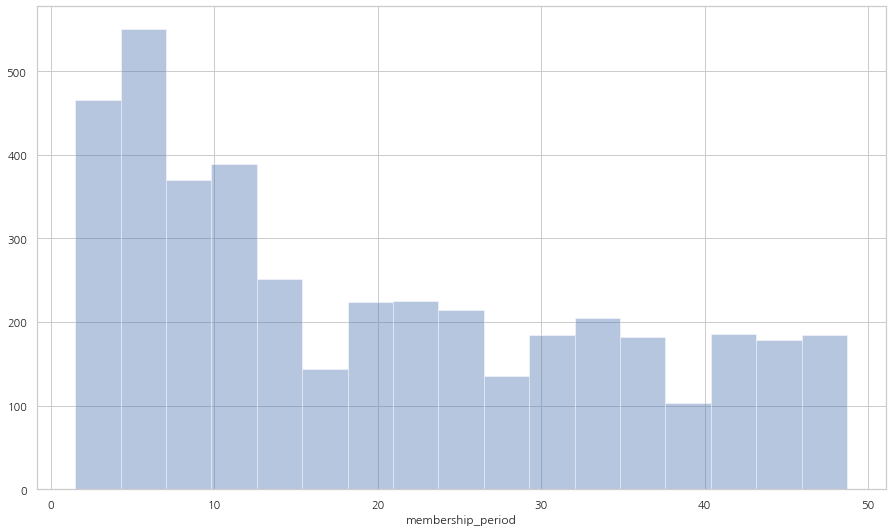

In [48]:
# 회원 기간에 대한 히스토그램

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12.5, 7.5))
sns.distplot(customer_join_with_membership_period["membership_period"], kde = False)

plt.tight_layout()
plt.show()

In [50]:
# 탈퇴 회원의 데이터 샛과 지속 회원의 데이터 셋 비교

print("* description of customer_end :")
customer_end = customer_join_with_membership_period.loc[customer_join_with_membership_period["is_deleted"] == 1]
display(customer_end.describe())

print("* description of customer_stay :")
customer_stay = customer_join_with_membership_period.loc[customer_join_with_membership_period["is_deleted"] == 0]
display(customer_stay.describe())

* description of customer_end :


,price,membership_period,is_deleted,mean,median,max,min,routine_flg
count,1350.000000,1350.000000,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,8595.555556,9.007111,1.0,3.865474,3.621852,6.461481,1.821481,0.456296
std,1949.163652,5.170038,0.0,1.246385,1.270847,2.584021,0.976361,0.498271
min,6000.000000,1.500000,1.0,1.000000,1.000000,1.000000,1.000000,0.000000
25%,6000.000000,5.000000,1.0,3.000000,3.000000,4.000000,1.000000,0.000000
50%,7500.000000,8.100000,1.0,4.000000,4.000000,7.000000,2.000000,0.000000
75%,10500.000000,12.100000,1.0,4.666667,4.500000,8.000000,2.000000,1.000000
max,10500.000000,24.300000,1.0,9.000000,9.000000,13.000000,8.000000,1.000000


* description of customer_stay :


,price,membership_period,is_deleted,mean,median,max,min,routine_flg
count,2842.000000,2842.000000,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,8542.927516,25.202533,0.0,6.030288,6.024279,8.471147,3.620690,0.984166
std,1977.189779,14.028692,0.0,1.553587,1.599765,1.571048,2.030488,0.124855
min,6000.000000,1.500000,0.0,3.166667,3.000000,5.000000,1.000000,0.000000
25%,6000.000000,13.000000,0.0,4.833333,5.000000,7.000000,2.000000,1.000000
50%,7500.000000,25.300000,0.0,5.583333,5.500000,8.000000,3.000000,1.000000
75%,10500.000000,36.500000,0.0,7.178030,7.000000,10.000000,5.000000,1.000000
max,10500.000000,48.700000,0.0,12.000000,12.000000,14.000000,12.000000,1.000000


In [51]:
customer_join_with_membership_period.to_csv("./dump_files/customer_join_with_membership_period.csv", index = False)